<a href="https://colab.research.google.com/github/AmanenderRreddy/my-1st-repository/blob/master/knn_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [61]:
import io
import pandas as pd
df1 = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train= df1.values
test=df2.values
print(train)
print(test)

[[1.         0.73323103 0.70872818]
 [0.         0.2779388  0.75679256]
 [2.         1.         0.2495871 ]
 [2.         0.8152617  0.25900964]
 [0.         0.05896489 1.        ]
 [2.         0.77539129 0.        ]
 [1.         0.8122803  0.58840333]
 [0.         0.18438604 0.9118896 ]
 [1.         0.77907889 0.50729138]
 [2.         0.98932354 0.11546255]
 [0.         0.         0.85629492]
 [1.         0.59992234 0.7610029 ]
 [2.         0.75891498 0.21364219]
 [0.         0.13017985 0.82095993]
 [1.         0.62394714 0.61749297]]
[[0.48285115 0.96393327]
 [0.59215062 0.76628275]
 [0.18733338 0.25101217]
 [0.79711183 0.68406495]
 [0.28757313 0.65992994]
 [0.94772844 0.45582843]
 [0.25108305 0.98923339]
 [0.4424671  0.93948397]
 [0.09469225 0.47709481]]


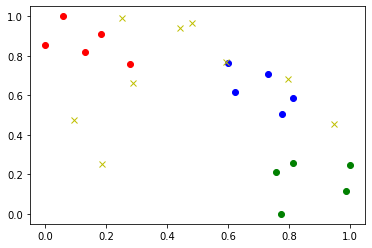

In [62]:

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

lables=train[:,0]
trains=train[:,1:]
x=trains[lables==0]
y=trains[lables==1]
z=trains[lables==2]
plt.plot(x[:,0],x[:,1], 'ro')
plt.plot(y[:,0],y[:,1], 'bo')
plt.plot(z[:,0],z[:,1], 'go')

plt.plot(test[:,0],test[:,1],'yx')

plt.show()


In [63]:
d=cdist(test,trains)               #d=distance of test and trains
print(d)


[[0.35751884 0.29136978 0.88189194 0.77936776 0.42541788 1.00734656
  0.4995461  0.30296859 0.54430938 0.98813808 0.49470319 0.23427847
  0.79946729 0.38055016 0.3740708 ]
 [0.15236866 0.31435511 0.65826705 0.55417016 0.58216044 0.7878873
  0.28301619 0.43298188 0.31940368 0.76243902 0.59895288 0.00939556
  0.57725379 0.46519522 0.15214932]
 [0.71239609 0.51383182 0.81266787 0.62797925 0.7599087  0.63938973
  0.71020522 0.660884   0.64485796 0.81336457 0.6336095  0.65598795
  0.57280193 0.57280622 0.57003487]
 [0.0684765  0.52424225 0.47951497 0.42544263 0.8029171  0.6844097
  0.09685674 0.65371016 0.17769097 0.60021165 0.81550624 0.21166752
  0.47197094 0.68083662 0.18552045]
 [0.44832157 0.09734058 0.82215162 0.66271586 0.40976747 0.82065466
  0.52955988 0.27227054 0.51466148 0.88819951 0.34822049 0.32829525
  0.64910392 0.22517394 0.33904037]
 [0.33161337 0.73430074 0.21276231 0.23724475 1.04212444 0.48731884
  0.1895318  0.88920381 0.1763267  0.34289807 1.02886472 0.46270999
  0.30

In [64]:
#we need 3 narest neighbour
#e=d.argsort(axis=1)
#f=e[:,:3]
e=d.argsort(axis=1)                 #e=storing the sorted distance
f=e[:,:5]                           #f=taking the first 5 sorted elements
#e=d.argsort(axis=1)
#f=e[:,:7]
print(e)
print(f)


[[11  1  7  0 14 13  4 10  6  8  3 12  2  9  5]
 [11 14  0  6  1  8  7 13  3 12  4 10  2  9  5]
 [ 1 14 12 13  3 10  5  8 11  7  6  0  4  2  9]
 [ 0  6  8 14 11  3 12  2  1  9  7 13  5  4 10]
 [ 1 13  7 11 14 10  4  0  8  6 12  3  5  2  9]
 [ 8  6  2  3 12  0  9 14 11  5  1  7 13 10  4]
 [ 7  4 13  1 10 11 14  0  6  8  3 12  2  5  9]
 [11  1  7 13 14  0  4 10  6  8  3 12  2  9  5]
 [ 1 13 10  7  4 14 11  0  8 12  6  3  5  2  9]]
[[11  1  7  0 14]
 [11 14  0  6  1]
 [ 1 14 12 13  3]
 [ 0  6  8 14 11]
 [ 1 13  7 11 14]
 [ 8  6  2  3 12]
 [ 7  4 13  1 10]
 [11  1  7 13 14]
 [ 1 13 10  7  4]]


In [65]:
lables[f]                                     #here we are finding the lables of f

array([[1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0.],
       [0., 1., 2., 0., 2.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [1., 1., 2., 2., 2.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [66]:
from scipy import stats

mode=stats.mode(lables[f],axis=1)                                       # initially mode is in matrix form of dimensions 9x1 so we are converting it in to a vector of dimension 9
#mode=np.squeeze(np.array(mode)).reshape(-1)
w=mode[0]                                        
print(w)                                                                # we are storing the 0 coloumn vlues in w
v_mode=w.reshape(-1) #or reshape=w.reshape(9)                           # v_mode is the mode values in vector form
print(reshape)                                                        


[[1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]]
[1. 1. 0. 1. 0. 2. 0. 0. 0.]


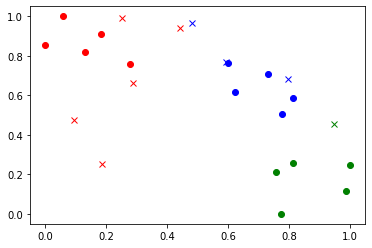

In [67]:
red=test[v_mode==0]
blue=test[v_mode==1]
green=test[v_mode==2]
#print(red)
#print(blue)
#print(green)
plt.plot(x[:,0],x[:,1], 'ro')
plt.plot(y[:,0],y[:,1], 'bo')
plt.plot(z[:,0],z[:,1], 'go')
plt.plot(red[:,0],red[:,1], 'rx')
plt.plot(blue[:,0],blue[:,1], 'bx')
plt.plot(green[:,0],green[:,1], 'gx')
plt.show()